# 実例を対象とした分類法入門

品種の分からない花のデータに対して、**クラス分類（classification）**または、**教師あり学習（supervised learning）**と呼ばれる手法を使って、品種を予測したい。

## アイリスデータセット

**アイリス**という花に関するデータについて見ていくことにする。このデータセットには3つの品種のアイリスデータで構成されている。サンプルされたアイリスを対象に、次の4つの要素がそれぞれ計測されている。

* がく片の長さ（Sepal length）
* がく片の幅（Sepal width）
* 花弁の長さ（Petal length）
* 花弁の幅（Petal width）

こういったものを**特徴量（features）**と呼ぶこととする。

### 可視化からはじめる

ここで扱うデータは非常に小さいため、すべての点を描画してデータを確認してみる。

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

sklearnからload_iris()を用いてデータをロードする

In [2]:
data = load_iris()

In [3]:
features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']
labels = target_names[target]

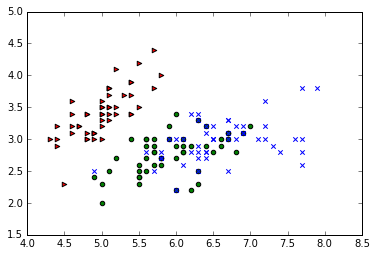

In [4]:
%matplotlib inline

for t, marker, c in zip(range(3), ">ox", "rgb"):
    plt.scatter(features[target == t, 0], features[target == t, 1], marker=marker, c=c)

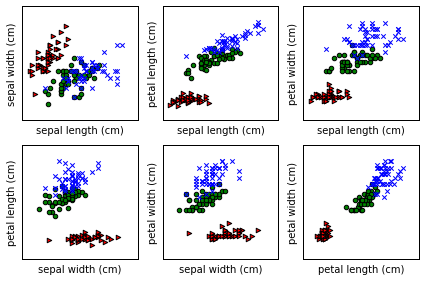

In [5]:
%matplotlib inline

# plt.figure(num=None, figsize=(8,6))
fig,axes = plt.subplots(2, 3)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Set up 3 different pairs of (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[
                    target == t, p1], marker=marker, c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()

### 初めての分類モデル作成

3つの花をグループに分類するのであれば、たとえば「花弁の長さ」を利用することで*Setosa*アイリスを他の品種と見分けることが出来そうである。

In [6]:
plength = features[:,2]
is_setosa = (labels == 'setosa')

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.
